# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [3]:
#ваш код
import pandas as pd
import numpy as np

# Загрузка файла Advertising.csv
data = pd.read_csv("Advertising.csv")

# Просмотр первых строк данных
print(data.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
#ваш код
# Проверка наличия пропусков в данных
missing_data = data.isnull().sum()
print("Количество пропусков в каждом столбце:")
print(missing_data)

# Удаление строк с пропусками, если они есть
if missing_data.sum() > 0:
    data = data.dropna()
    print("\nПропуски были обнаружены и удалены.")
else:
    print("\nПропусков в данных нет.")

# Просмотр данных после обработки
print("\nПервые строки после удаления пропусков (если они были):")
print(data.head())


Количество пропусков в каждом столбце:
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Пропусков в данных нет.

Первые строки после удаления пропусков (если они были):
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [4]:
#ваш код
# Разделение на предикторы (X) и целевую переменную (y)
X = data[["TV", "radio", "newspaper"]].values  # Признаки (предикторы)
y = data["sales"].values  # Целевая переменная

# Проверим формы массивов
print("Форма X (предикторы):", X.shape)
print("Форма y (целевая переменная):", y.shape)


Форма X (предикторы): (200, 3)
Форма y (целевая переменная): (200,)


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [ ]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [ ]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [17]:
# Увеличение числа итераций
num_iterations = 5000

# Точность (порог для остановки)
tolerance = 1e-6

# Координатный спуск
w = np.zeros(X.shape[1])
for _ in range(num_iterations):
    r = y - np.dot(X, w)  # Остатки
    prev_w = np.copy(w)  # Для проверки изменения весов
    for j in range(X.shape[1]):
        numerator = np.dot(X[:, j], r + X[:, j] * w[j])
        denominator = np.dot(X[:, j], X[:, j])
        if denominator != 0:
            w[j] = numerator / denominator
        r = y - np.dot(X, w)
    # Проверка сходимости
    if np.linalg.norm(w - prev_w) < tolerance:
        break

print("Итоговые веса модели (координатный спуск):", w)


Итоговые веса модели (координатный спуск): [-2.12966299e+00  1.06963050e-14  2.11612320e+01  1.41281732e+01
 -1.05693513e-01]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [18]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[-2.11906762 -0.14984071 21.16123164 14.1281713  -0.10569215]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [20]:
# Вычисляем среднее и стандартное отклонение для каждого столбца
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

# Обнаружим столбцы с нулевым стандартным отклонением
zero_std_columns = np.where(X_std == 0)[0]
if zero_std_columns.size > 0:
    print(f"Столбцы с нулевым стандартным отклонением: {zero_std_columns}")
    # Устанавливаем std для таких столбцов равным 1, чтобы избежать деления на 0
    X_std[zero_std_columns] = 1

# Масштабируем X
X_scaled = (X - X_mean) / X_std

# Проверим результат
print("Среднее значение каждого столбца после масштабирования:", X_scaled.mean(axis=0))
print("Стандартное отклонение каждого столбца после масштабирования:", X_scaled.std(axis=0))


Столбцы с нулевым стандартным отклонением: [0]
Среднее значение каждого столбца после масштабирования: [ 0.00000000e+00  1.00000000e+00 -3.55271368e-17 -2.22044605e-16
 -1.24344979e-16]
Стандартное отклонение каждого столбца после масштабирования: [0. 0. 1. 1. 1.]


**Добавим единичный столбец**

In [ ]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [23]:
#ваш код
def mse_error(y_true, y_pred):
    """
    Вычисляет среднеквадратичную ошибку (MSE).
    Args:
        y_true: Массив реальных значений.
        y_pred: Массив предсказанных значений.
    Returns:
        mse: Среднеквадратичная ошибка.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse


**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [31]:
#ваш код
# Наивный прогноз: предсказание средним значением
y_mean = np.mean(y)  # Среднее значение целевой переменной
y_pred_naive = np.full_like(y, y_mean)  # Все предсказания равны среднему значению

# Расчет MSE для наивного прогноза
mse_naive = mse_error(y, y_pred_naive)

# Вывод результатов
print("Среднее значение целевой переменной (наивный прогноз):", y_mean)
print("MSE для наивного прогноза:", mse_naive)



Среднее значение целевой переменной (наивный прогноз): 0.0
MSE для наивного прогноза: 1.0


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [26]:
#ваш код
def lin_pred(X, w):
    """
    Вычисляет прогнозы линейной модели.
    
    Args:
        X: Матрица предикторов (n_samples, n_features).
        w: Вектор весов модели (n_features, ).
        
    Returns:
        y_pred: Вектор прогнозов (n_samples, ).
    """
    y_pred = np.dot(X, w)
    return y_pred



**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [28]:
#ваш код
def stoch_grad_step(X, y, w, train_ind, eta):
    """
    Реализует шаг стохастического градиентного спуска.
    
    Args:
        X: Матрица предикторов (n_samples, n_features).
        y: Вектор целевой переменной (n_samples, ).
        w: Вектор текущих весов модели (n_features, ).
        train_ind: Индекс объекта обучающей выборки.
        eta: Шаг градиентного спуска.
    
    Returns:
        w_updated: Обновленный вектор весов (n_features, ).
    """
    # Количество элементов в выборке
    l = X.shape[0]
    
    # Вычисление предсказания для train_ind
    y_pred = np.dot(X[train_ind], w)
    
    # Вычисление направления изменения
    grad = (2 / l) * X[train_ind] * (y_pred - y[train_ind])
    
    # Обновление весов
    w_updated = w - eta * grad
    
    return w_updated


**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [32]:
# ваш код
import numpy as np

def stochastic_gradient_descent(X, y, w_init, eta, max_iter, tol):
    """
    Реализует алгоритм стохастического градиентного спуска.
    
    Args:
        X: Матрица признаков (n_samples, n_features).
        y: Целевая переменная (n_samples, ).
        w_init: Инициализирующий вектор весов (n_features, ).
        eta: Темп обучения.
        max_iter: Максимальное количество итераций.
        tol: Порог для евклидового расстояния между весами.
    
    Returns:
        w: Финальный вектор весов (n_features, ).
        errors: Список значений среднеквадратичной ошибки на каждой итерации.
    """
    # Инициализация
    w = w_init
    prev_w = w_init.copy()
    distance = float('inf')  # Начальное расстояние между весами
    errors = []  # Список для фиксации ошибок
    iter_count = 0  # Счетчик итераций

    # Основной цикл обучения
    while distance > tol and iter_count < max_iter:
        # Случайный индекс строки
        train_ind = np.random.randint(0, X.shape[0])
        
        # Вычисление текущей ошибки и сохранение в список
        y_pred = lin_pred(X, w)  # Используем ранее написанную функцию lin_pred
        mse = mse_error(y, y_pred)  # Используем функцию mse_error
        errors.append(mse)
        
        # Обновление весов
        w = stoch_grad_step(X, y, w, train_ind, eta)
        
        # Вычисление расстояния между векторами весов
        distance = np.linalg.norm(w - prev_w)
        
        # Сохранение текущего вектора весов
        prev_w = w.copy()
        
        # Увеличение счетчика итераций
        iter_count += 1

    return w, errors

# Пример использования
np.random.seed(42)
X_example = np.array([[1, 2], [1, 3], [1, 4]])
y_example = np.array([5, 7, 9])
w_init_example = np.zeros(X_example.shape[1])
eta_example = 0.01
max_iter_example = 1000
tol_example = 1e-6

w_final, errors = stochastic_gradient_descent(X_example, y_example, w_init_example, eta_example, max_iter_example, tol_example)

print("Финальные веса:", w_final)
print("Список ошибок (первые 5 значений):", errors[:5])


Финальные веса: [0.70761259 2.09745593]
Список ошибок (первые 5 значений): [np.float64(51.666666666666664), np.float64(40.75346666666667), np.float64(38.07041656296297), np.float64(30.042306738202075), np.float64(23.718596452525947)]


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

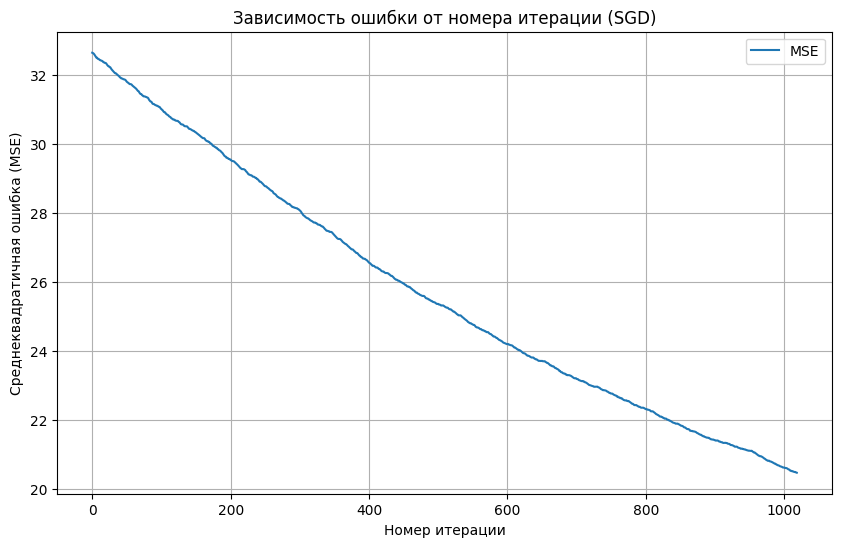

In [34]:
# ваш код
import matplotlib.pyplot as plt

# Параметры для запуска стохастического градиентного спуска
np.random.seed(42)
X_example = np.random.rand(100, 3)  # Признаки (100 объектов, 3 признака)
y_example = np.random.rand(100) * 10  # Целевая переменная

# Инициализация весов и параметров
w_init_example = np.zeros(X_example.shape[1] + 1)  # Вектор начальных весов (включая свободный коэффициент)
eta_example = 0.01  # Темп обучения
max_iter_example = 10**5  # Максимальное количество итераций
tol_example = 1e-6  # Порог для сходимости

# Добавление столбца единиц для свободного коэффициента
X_example = np.hstack([np.ones((X_example.shape[0], 1)), X_example])

# Запуск стохастического градиентного спуска
w_final, errors = stochastic_gradient_descent(
    X_example, y_example, w_init_example, eta_example, max_iter_example, tol_example
)

# Построение графика зависимости ошибки от номера итерации
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, label="MSE")
plt.xlabel("Номер итерации")
plt.ylabel("Среднеквадратичная ошибка (MSE)")
plt.title("Зависимость ошибки от номера итерации (SGD)")
plt.legend()
plt.grid(True)
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [35]:
# ваш код
# Вывод финального вектора весов
print("Финальный вектор весов (w_final):", w_final)


Финальный вектор весов (w_final): [0.83565531 0.41299174 0.42367309 0.41618345]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [36]:
# ваш код
# Среднеквадратичная ошибка на последней итерации
print("Среднеквадратичная ошибка на последней итерации (MSE):", errors[-1])


Среднеквадратичная ошибка на последней итерации (MSE): 20.45889223673923
